In [35]:
# Tensorflow and tf.Keras APIs
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Activation, Flatten, MaxPooling2D, Dropout
print(tf.__version__)
# Supplementing/ helper Libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
import math
# Python Image Library
import PIL
from skimage.color import rgba2rgb
from skimage import data
import cv2
from PIL import Image
import numpy as np
import os
from glob import glob
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

def search_dir(parent):
  file_name = parent + '/**/*.png'
  files = glob(file_name,recursive =True)
  return files
open_path = "/content/drive/MyDrive/NewOysterDataset/Oyster"
closed_path = "/content/drive/MyDrive/NewOysterDataset/NoOyster"
open_images = search_dir(open_path)
closed_images = search_dir(closed_path)

def combine_data(full_image_list, full_label_list, new_img_list, new_label):
  for file in new_img_list:
    img = Image.open(file).resize((256,256))
    img = rgba2rgb(img)
    img_arr = np.asarray(img)
    full_image_list.append(img_arr)
    full_label_list.append(new_label)
  return full_image_list, full_label_list

def unison_shuffled_copies(I, L):
  assert len(I) == len(L)
  p = np.random.permutation(len(I))
  return I[p], L[p]

images = []
labels = []
images_1, labels_1 = combine_data(images, labels, open_images, 0 )
images_2, labels_2 = combine_data(images_1, labels_1, closed_images, 1 )
CATEGORIES = ['Oyster ', 'No Oyster ']
category_to_index = dict((name, index) for index,name in enumerate
(CATEGORIES))
category_to_index
fish_dataset = np.array(images_1)
label_dataset = np.array(labels_1)
#Check shape and size of the dataset arrays
print(len(fish_dataset))
print(len(label_dataset))
print (fish_dataset.shape)
print('Original order of images/labels: \n' , label_dataset)
fish_dataset, label_dataset = unison_shuffled_copies(fish_dataset,
label_dataset)
print ()
print('Shuffled order of images/labels: \n' , label_dataset)
split=int(len(fish_dataset)*.1)
print(int(split))
train_img=np.array(fish_dataset)[split:]
train_lbl=np.array(label_dataset)[split:]
test_img= np.array(fish_dataset)[0:split]
test_lbl = np.array(label_dataset)[0:split]
print(test_lbl)

2.8.2
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
371
371
(371, 256, 256, 3)
Original order of images/labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]

Shuffled order of images/labels: 
 [1 0 0 1 0 

In [36]:
!pip install -q -U keras-tuner

In [37]:
import keras_tuner as kt

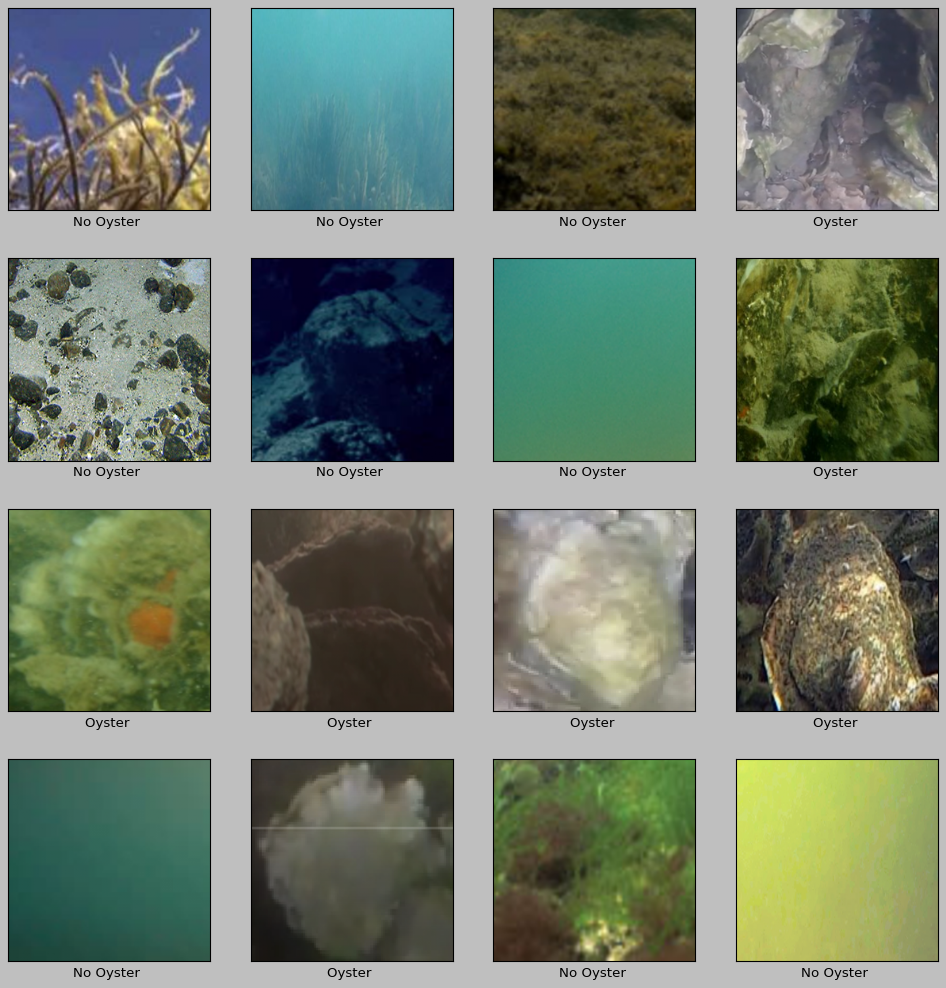

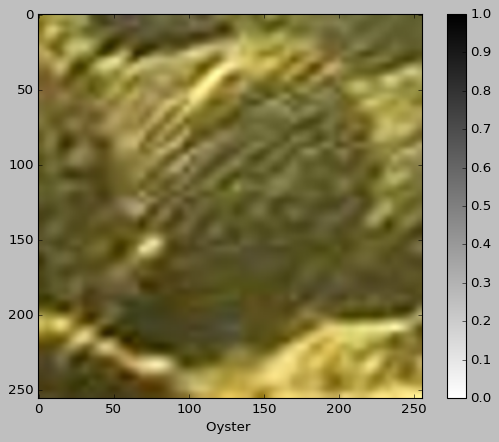

In [38]:
def display_images(images, labels):
  plt.figure(figsize=(15,15))
  grid_size = min(16, len(images))
  for i in range(grid_size):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(CATEGORIES[labels[i]])

display_images(train_img, train_lbl)
plt.show()

subtitle = 112
plt.figure()
plt.imshow(images[subtitle], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(CATEGORIES[labels[subtitle]])
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3,padding='same',
    activation= 'relu', input_shape=(256,256,3)),
    (keras.layers.MaxPooling2D(pool_size=(2,2))),
    (tf.keras.layers.Dropout(0.3)),

  (keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',
    activation=tf.nn.relu)),
    (keras.layers.MaxPooling2D(pool_size = (2,2))),
    (keras.layers.Dropout(0.5)),

  (keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',
    activation=tf.nn.relu)),
    (keras.layers.MaxPooling2D(pool_size = (2,2))),
    (keras.layers.Dropout(0.5)),

  (keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',
    activation=tf.nn.relu)),
    (keras.layers.MaxPooling2D(pool_size = (2,2))),
    (keras.layers.Dropout(0.5)),

  (keras.layers.Flatten()),
    (keras.layers.Dense(128,activation=tf.nn.relu)),
    (tf.keras.layers.Dropout(0.5)),
    keras.layers.Dense(64,activation='relu'),
    (tf.keras.layers.Dropout(0.25)),

  (keras.layers.Dense(2, activation=tf.nn.softmax))])

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  
  return model

In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=10,
                     factor=2)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_img,train_lbl, epochs=500, validation_split=0.1, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history=model.fit(train_img,train_lbl, validation_split=0.1, epochs =500)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

hypermodel = tuner.hypermodel.build(best_hps)
history=hypermodel.fit(train_img,train_lbl, epochs=best_epoch, validation_split=0.1)

plt.style.use('dark_background')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'],'r--',history.history['val_accuracy'],'b--')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'],'r--',history.history['val_loss'],'b--')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show()
hypermodel.evaluate(test_img, test_lbl, batch_size = 1, verbose = 1)
def make_labels( new_img_list, new_label):
  images = []
  labels = []
  for file in new_img_list:
    img = Image.open(file).resize((256,256))
    img_arr = np.asarray(img)
    images.append(img_arr)
    labels.append(new_label)
  return images, labels

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/500
10/10 [==============================] - 2s 109ms/step - loss: 1.0802 - accuracy: 0.4800 - val_loss: 0.6925 - val_accuracy: 0.5588
Epoch 2/500
10/10 [==============================] - 1s 88ms/step - loss: 0.6893 - accuracy: 0.5700 - val_loss: 0.6908 - val_accuracy: 0.5588
Epoch 3/500
10/10 [==============================] - 1s 93ms/step - loss: 0.6818 - accuracy: 0.5500 - val_loss: 0.6815 - val_accuracy: 0.5588
Epoch 4/500
10/10 [==============================] - 1s 89ms/step - loss: 0.6521 - accuracy: 0.5500 - val_loss: 0.6262 - val_accuracy: 0.5588
Epoch 5/500
10/10 [==============================] - 1s 90ms/step - loss: 0.5651 - accuracy: 0.5800 - val_loss: 0.5966 - val_accuracy: 0.5588
Epoch 6/500
10/10 [==============================] - 1s 101ms/step - loss: 0.5349 - accuracy: 0.6

In [29]:
def make_labels( new_img_list, new_label):
  images = []
  labels = []
  for file in new_img_list:
    img = Image.open(file).resize((256,256))
    img = rgba2rgb(img)
    img_arr = np.asarray(img)
    images.append(img_arr)
    labels.append(new_label)
  return images, labels

test1_path = "/content/drive/MyDrive/NewOysterDataset/TestData/Oyster"
test2_path = "/content/drive/MyDrive/NewOysterDataset/TestData/NoOyster"

test1_images = search_dir(test1_path)
test2_images = search_dir(test2_path)
images = []
labels = []
images_test1, labels_test1 = make_labels( test1_images, 0 )
images_test2, labels_test2 = make_labels( test2_images, 1 )

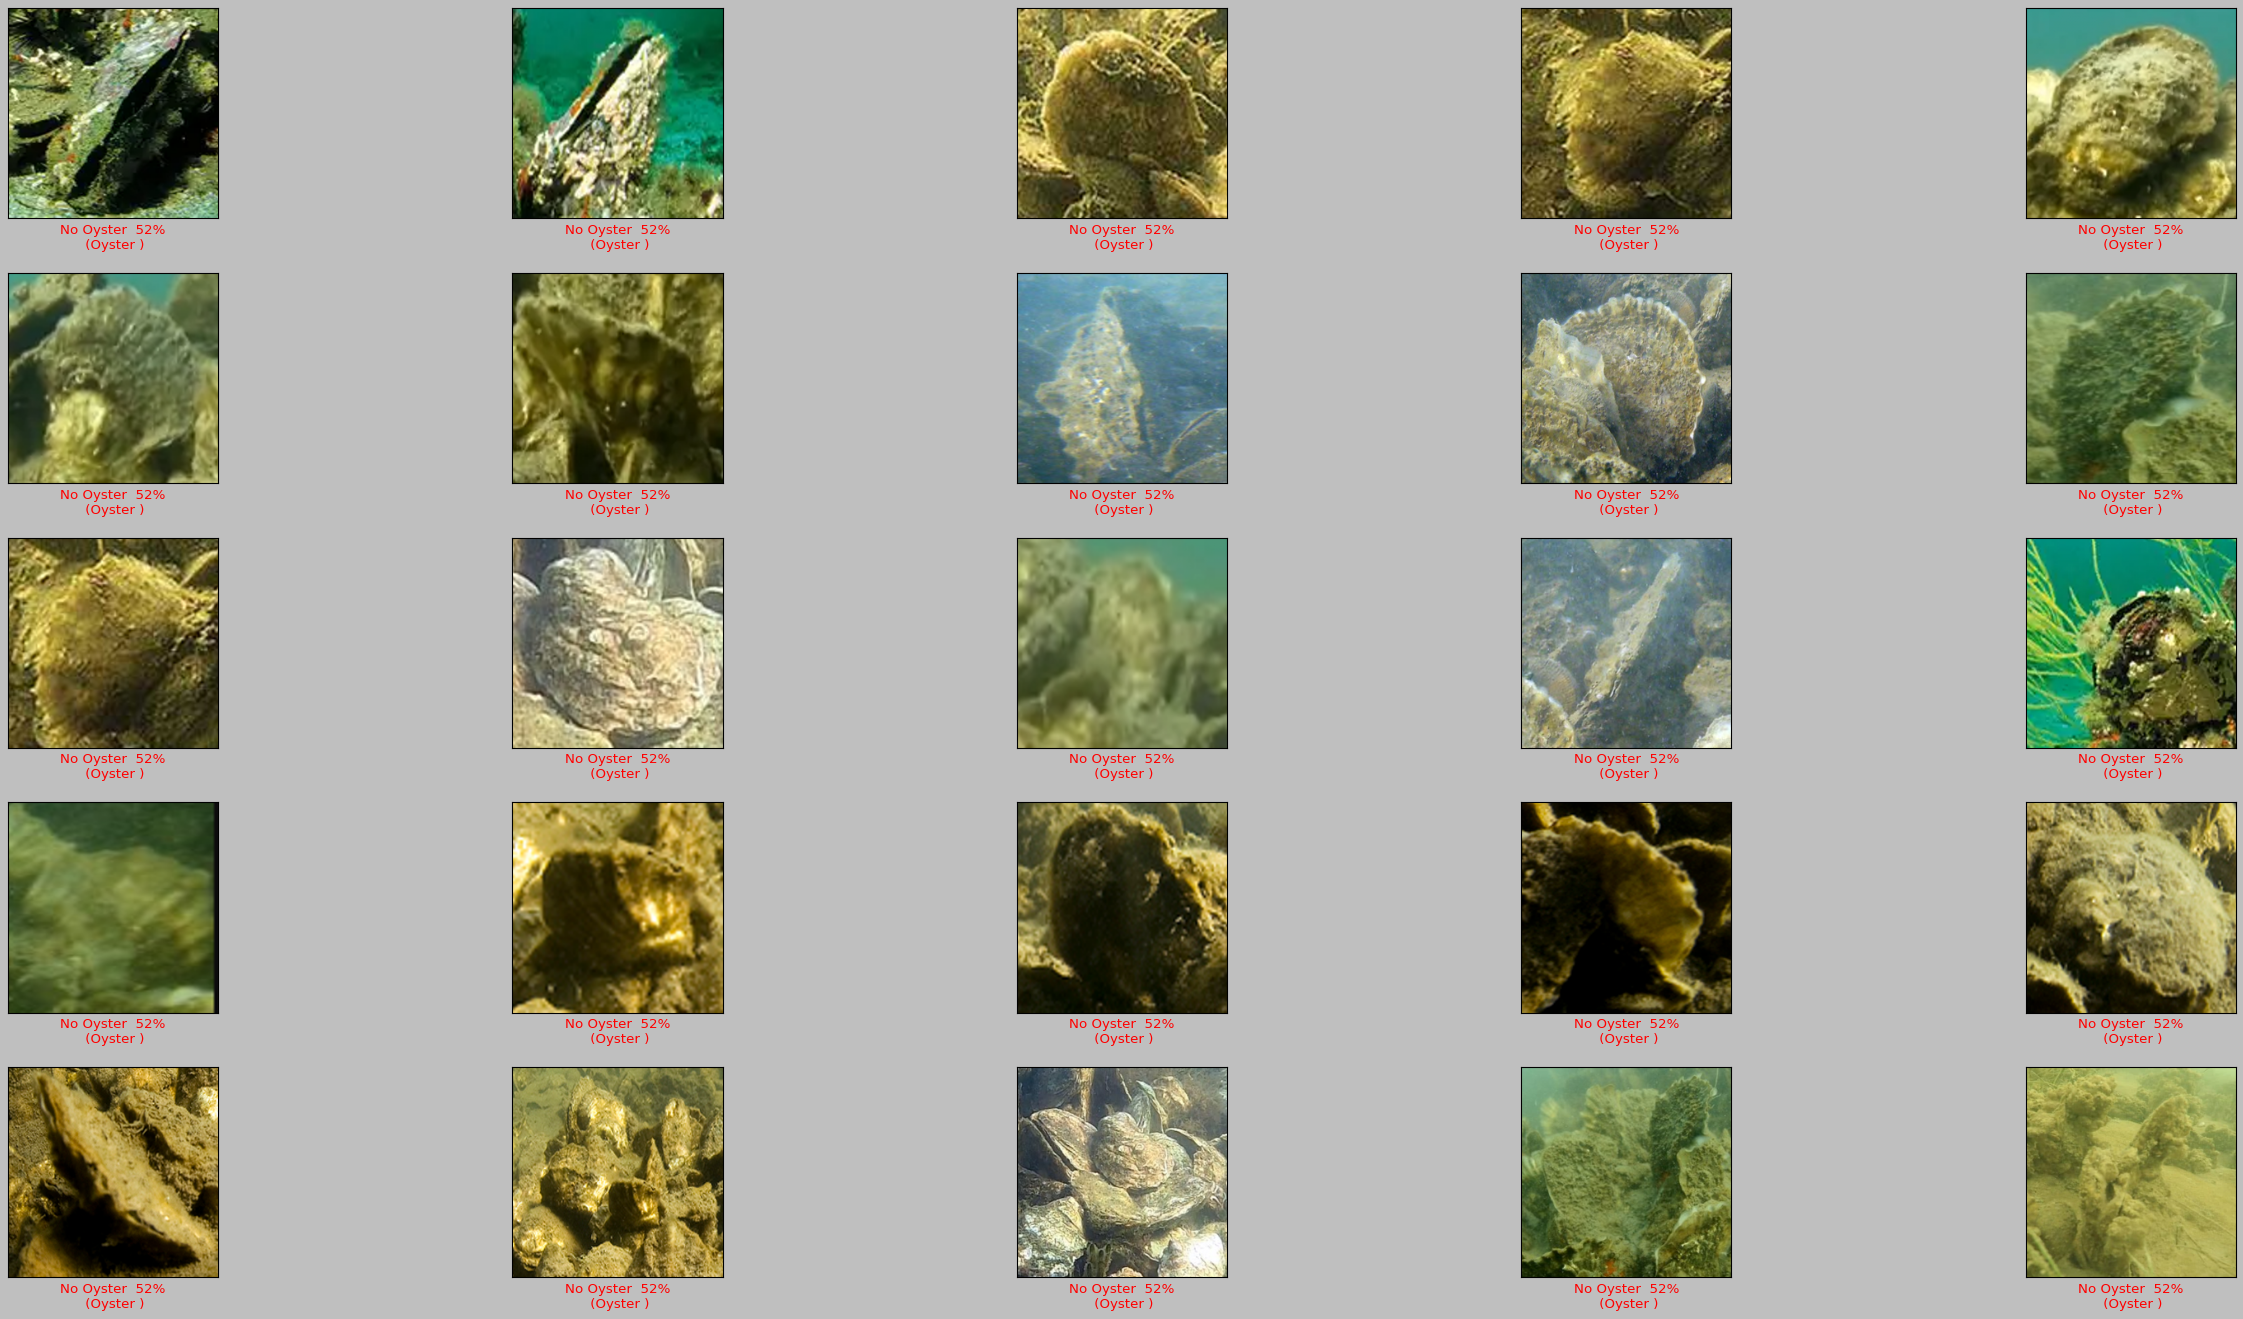

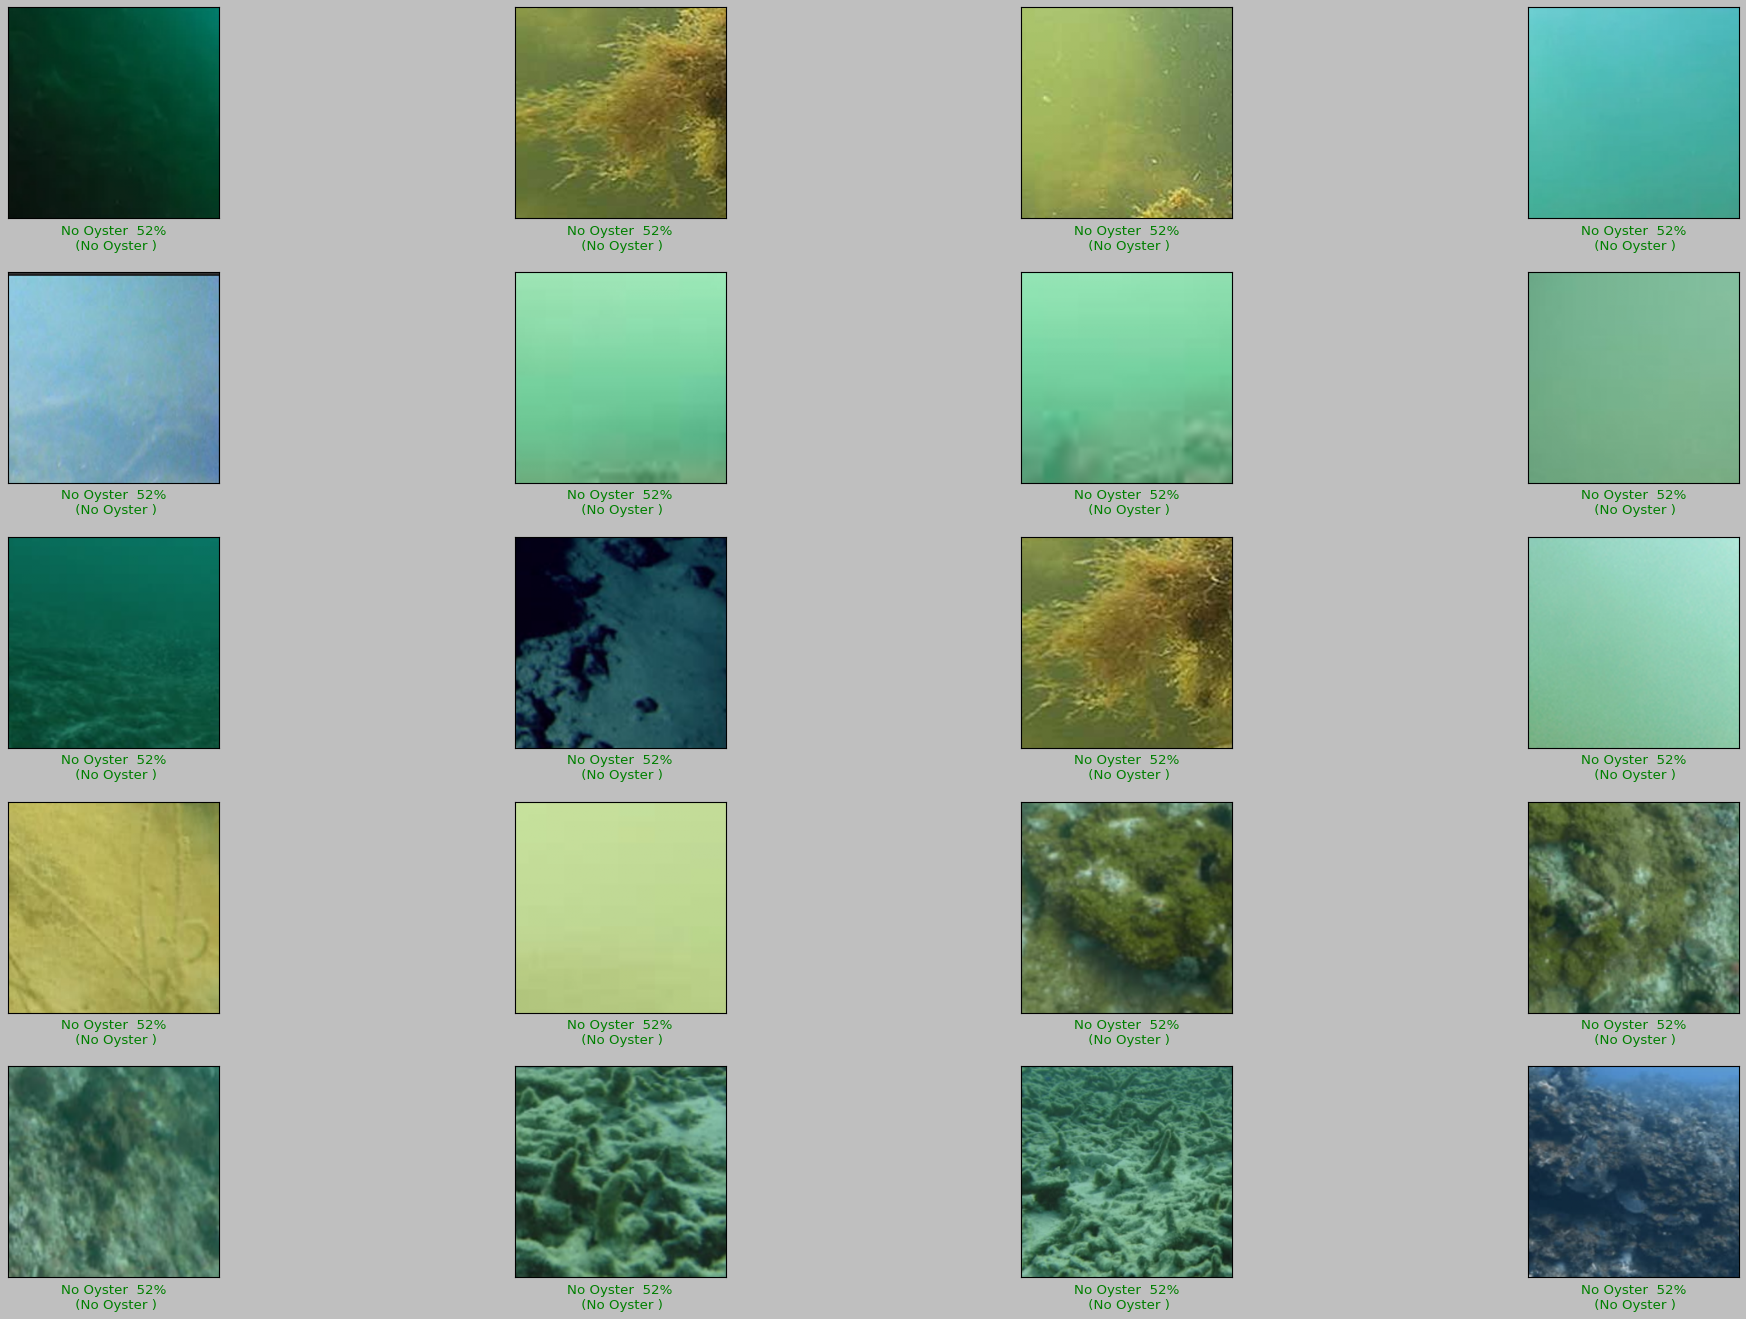

In [30]:
import statistics
from statistics import mode
def disp_full_img (path):
  full_img = Image.open (path)
  img_arr=np.asarray(full_img)
  plt.figure(figsize=(10,10))
  grid_size = 25
  #plt.subplot(5, 5)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img_arr, cmap=plt.cm.binary)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}%\n ({})".format(CATEGORIES[predicted_label],
  100*np.max(predictions_array),
  CATEGORIES[true_label]),
  color=color)

def species_list(predictions_array , answers ):
  print("Prediction: Actual:")
  picture=0
  for picture in range (0,len (predictions_array)):
    img_guess_num = np.argmax (predictions_array[picture])
    img_guess_name = CATEGORIES[img_guess_num]
    print(img_guess_name," ", answers)
    picture +1

def species_guess(predictions_array):
  results= []
  img_guess_num = np.argmax(predictions_array)
  picture = 0
  for picture in range (0,len(predictions_array)):
    img_guess_num = np.argmax(predictions_array[picture])
    results.append(img_guess_num)
    picture + 1
  final_guess = mode(results)
  return CATEGORIES[final_guess]

plt.style.use('classic')
test_set = np.array(images_test1)
test_labels = np.array(labels_test1)
predictions= best_model.predict(test_set)
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols*2, 2*num_rows*2))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels,test_set)
  
plt.show()

plt.style.use('classic')
test_set = np.array(images_test2)
test_labels = np.array(labels_test2)
predictions= best_model.predict(test_set)
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols*2, 2*num_rows*2))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels,test_set)
  
plt.show()